In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
type(fashion_mnist)

2024-06-08 07:04:56.767959: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-08 07:04:56.768083: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-08 07:04:56.909700: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


tuple

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]

In [4]:
X_train.shape

(55000, 28, 28)

In [5]:
X_train.dtype

dtype('uint8')

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
y_train[0]

9

In [8]:
# Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [9]:
#Here are the corresponding class names:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
# Creating the model using the sequential API

tf.random.set_seed(42)
model = tf.keras.Sequential() # using sequential model
model.add(tf.keras.layers.Input(shape = [28, 28])) # adding input layer specifying input size
model.add(tf.keras.layers.Flatten()) # it will convert the input into 1d array
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [13]:
hidden1 = model.get_layer("dense")
hidden1.name

'dense'

In [14]:
weights, biases = hidden1.get_weights()
weights

array([[-0.04814877, -0.01269333, -0.06128072, ...,  0.02393993,
        -0.06089283, -0.07218519],
       [-0.07048298, -0.02016038, -0.01478473, ..., -0.06492938,
         0.05195962, -0.00677153],
       [-0.02000001,  0.01065145, -0.02763265, ...,  0.02606725,
        -0.06934488, -0.06588648],
       ...,
       [ 0.01287452, -0.01307184, -0.03754048, ..., -0.04801914,
         0.04269511,  0.05886292],
       [ 0.07132719,  0.06642702,  0.02796815, ..., -0.04721448,
         0.0592458 , -0.03688076],
       [-0.03901679, -0.03084911, -0.00892194, ...,  0.02704095,
         0.03142665,  0.00290485]], dtype=float32)

In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
weights.shape

(784, 300)

In [17]:
biases.shape

(300,)

In [18]:
# we can also set the parameters of any layer using set_weights()

In [19]:
# compiling the model by specifying the loss function and optimizer

model.compile(loss="sparse_categorical_crossentropy", # used when sparse labels and classes are exclusive
             optimizer="sgd", # stocastic GD, i.e., backpropagation is being used for training with default learning rate of 0.01
             metrics=["accuracy"])
# we can also specify any extra metrics to compute during training and evaluation




In [20]:
# training and evaluating the model

history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6980 - loss: 0.9682 - val_accuracy: 0.8274 - val_loss: 0.5025
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8283 - loss: 0.5009 - val_accuracy: 0.8448 - val_loss: 0.4502
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8450 - loss: 0.4485 - val_accuracy: 0.8468 - val_loss: 0.4271
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8555 - loss: 0.4185 - val_accuracy: 0.8560 - val_loss: 0.4079
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8617 - loss: 0.3967 - val_accuracy: 0.8598 - val_loss: 0.3961
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8665 - loss: 0.3796 - val_accuracy: 0.8632 - val_loss: 0.3861
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8708 - loss: 0.3652 - val_accuracy: 0.8648 - val_loss: 0.3794
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8751 - loss: 0.3528 - 

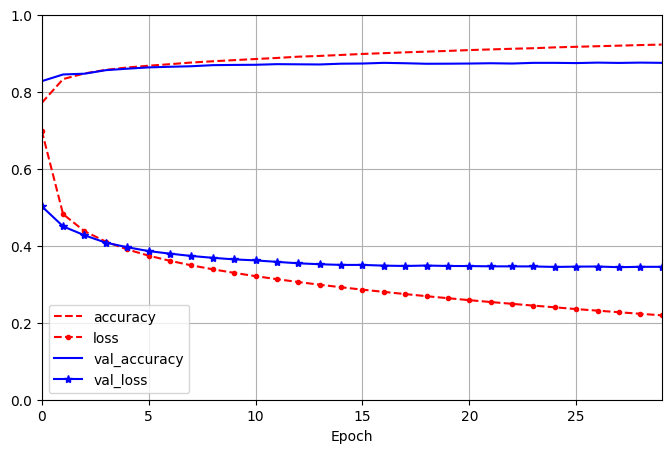

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8766 - loss: 0.3639


[0.3637468218803406, 0.8758000135421753]

In [23]:
# Using the model to make predictions

X_new = X_test[:3] # first 3 instances of test set
y_proba = model.predict(X_new) # for each instance, it gives one probability per class
y_proba.round(2) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.21, 0.  , 0.02, 0.  , 0.77],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [24]:
y_pred = y_proba.argmax(axis=-1) # argmax will give the class with highest probability for each instance
y_pred

array([9, 2, 1])

In [25]:
np.array(class_names)[y_pred] # corresponding class names

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [26]:
y_new = y_test[:3]
y_new # actual classes

array([9, 2, 1], dtype=uint8)

In [27]:
# it is making correct prediction for all the 3 instances selected